In [ ]:
import time
from datetime import date

startTime = time.time()
todaysDate = date.today()

In [ ]:
# only target the 2070 Super ...
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

#Training OpenAI GTP-2
Copyright 2021, Denis Rothman MIT License. Denis Rothman created the Colab notebook using the OpenAI repository, adding title steps for educational purposes only.

***Code References***

[Reference: OpenAI Repository](https://github.com/openai/gpt-2)
The repository was cloned and adapted to N Shepperd's repository.

[Reference: N Shepperd Repository](https://github.com/nshepperd/gpt-2)
The repository was not cloned. N Shepperd's training programs were inserted into the OpenAI Repository. The list of N Shepperd's programs are cited in the 'N Shepperd' section of the notebook. Some programs were modified for educational purposes only to work with this notebook.

***Model Reference Paper***

[Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, Ilya Sutskever,2019,'Language Models are Unsupervised Multitask Learners'](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf)


***Step 1: Pre-requisites:***

a) activate GPU in the notebook settings runTime menu <br>
b) Upload the following program files and mdset.txt(dataset) with the file manager: train.py,load_dataset.py,encode.py,accumulate,memory_saving_gradients.py,mdset.txt

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

#Steps 2 to 6: Initial steps of the training process

In [ ]:
#@title Step 2: Cloning the OpenAI GPT-2 Repository 
#!git clone https://github.com/nshepperd/gpt-2.git
# !git clone https://github.com/openai/gpt-2.git

Cloning into 'gpt-2'...
remote: Enumerating objects: 233, done.
remote: Total 233 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (233/233), 4.38 MiB | 21.87 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [1]:
#@title Step 3: Installing the requirements
import os                     # when the VM restarts import os necessary
os.chdir("/content/gpt-2")    
!pip3 install -r requirements.txt

FileNotFoundError: [Errno 2] No such file or directory: '/content/gpt-2'

In [ ]:
!pip install toposort

In [ ]:
#@title Step 4: Checking TensorFlow version 
#Colab has tf 1.x and tf 2.x installed
#Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
#@title Step 5: Downloading 117M parameter GPT-2 Model
# run code and send argument
import os # after runtime is restarted
os.chdir("/content/gpt-2")
!python3 download_model.py '117M' #creates model directory

Fetching checkpoint: 1.00kit [00:00, 1.16Mit/s]                                                     
Fetching encoder.json: 1.04Mit [00:00, 7.25Mit/s]                                                   
Fetching hparams.json: 1.00kit [00:00, 1.01Mit/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:23, 21.4Mit/s]                                  
Fetching model.ckpt.index: 6.00kit [00:00, 6.00Mit/s]                                               
Fetching model.ckpt.meta: 472kit [00:00, 4.14Mit/s]                                                 
Fetching vocab.bpe: 457kit [00:00, 3.47Mit/s]                                                       


In [ ]:
#@title Step 6: Copying the Project Resources to scr
!cp /content/mdset.txt /content/gpt-2/src/
!cp -r /content/gpt-2/models/ /content/gpt-2/src/

#Step 7: The N Shepperd training files

In [ ]:
#@title Step 7: Copying the N Shepperd Training Files
#Referfence GitHub repository: https://github.com/nshepperd/gpt-2
import os # import after runtime is restarted
!cp /content/train.py /content/gpt-2/src/
!cp /content/load_dataset.py /content/gpt-2/src/
!cp /content/encode.py /content/gpt-2/src/
!cp /content/accumulate.py /content/gpt-2/src/
!cp /content/memory_saving_gradients.py /content/gpt-2/src/

#Step 8: Encoding the dataset

In [ ]:
#@title Step 8:Encoding dataset
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
model_name="117M"
!python /content/gpt-2/src/encode.py mdset.txt out.npz 

Reading files
100% 1/1 [00:00<00:00,  5.64it/s]
Writing out.npz


#Step 9: Training a GPT-2 model

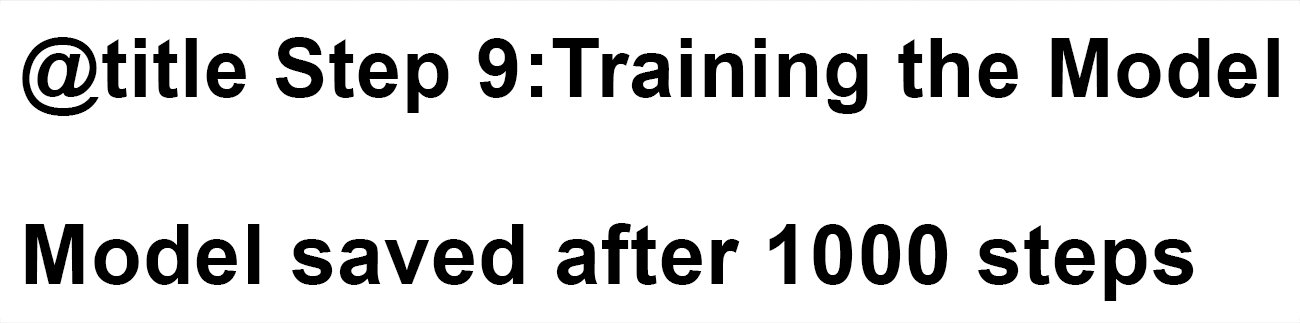

In [2]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIV/B17948_Appendix%20IV_01.PNG', width=400) #This is used for rendering images in the notebook

In [ ]:
#@title Step 9:Training the Model
#Model saved after 1000 steps
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src/")
!python train.py --dataset out.npz

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




2021-06-18 08:05:15.294089: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-06-18 08:05:15.294441: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558f3e54d2c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-06-18 08:05:15.294480: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-06-18 08:05:15.298330: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-18 08:05:15.589822: I tensorflow/stream_executo

#Step 10: Creating a training model directory

In [ ]:
#@title Step 10: Creating a Training Model directory
#Creating a Training Model directory named 'tgmodel'
import os
run_dir = '/content/gpt-2/models/tgmodel'
if not os.path.exists(run_dir):
  os.makedirs(run_dir)

In [ ]:
#@title Step 10A: Copying training Files
!cp /content/gpt-2/src/checkpoint/run1/model-1000.data-00000-of-00001 /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/checkpoint /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/model-1000.index /content/gpt-2/models/tgmodel
!cp /content/gpt-2/src/checkpoint/run1/model-1000.meta /content/gpt-2/models/tgmodel

In [ ]:
#@title Step 10B: Copying the OpenAI GPT-2 117M Model files
!cp /content/gpt-2/models/117M/encoder.json /content/gpt-2/models/tgmodel
!cp /content/gpt-2/models/117M/hparams.json /content/gpt-2/models/tgmodel
!cp /content/gpt-2/models/117M/vocab.bpe /content/gpt-2/models/tgmodel

In [ ]:
#@title Step 10C: Renaming the model directories
import os
!mv /content/gpt-2/models/117M  /content/gpt-2/models/117M_OpenAI
!mv /content/gpt-2/models/tgmodel  /content/gpt-2/models/117M

#Step 11: Generating unconditional samples

In [ ]:
#@title Step 11: Generating Unconditional Samples
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")
!python generate_unconditional_samples.py --model_name '117M'


2021-06-18 08:18:43.883508: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-18 08:18:43.915370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-18 08:18:43.915943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-06-18 08:18:43.916246: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-06-18 08:18:43.917680: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-06-18 08:18:43.919193: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021

#Step 12: Interactive context and completion examples

In [ ]:
#@title Step 12: Interactive Context and Completion Examples
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")
!python interactive_conditional_samples.py --temperature 0.8 --top_k 40 --model_name '117M' --length 50


2021-06-18 08:19:21.830534: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-18 08:19:21.859241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-18 08:19:21.859819: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2021-06-18 08:19:21.860123: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-06-18 08:19:21.861514: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-06-18 08:19:21.862937: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021

#Controlling Tokenized Data

In [ ]:
#@title Additional Tools: Controlling Tokenized Data
#Unzip out.npz
import zipfile
with zipfile.ZipFile('/content/gpt-2/src/out.npz', 'r') as zip_ref:
    zip_ref.extractall('/content/gpt-2/src/')

#Load arr_0.npy which contains encoded dset
import numpy as np
f=np.load('/content/gpt-2/src/arr_0.npy')
print(f)
print(f.shape)
for i in range(0,10):
    print(f[i])
     
#We first import encoder.json
import json
i=0
with open("/content/gpt-2/models/117M/encoder.json", "r") as read_file:
    print("Converting the JSON encoded data into a Python dictionary")
    developer = json.load(read_file) #converts the encoded data into a Python dictionary
    for key, value in developer.items(): #we parse the decoded json data
        i+=1
        if(i>10):
            break;
        print(key, ":", value)

#We will now search for the key and value for each encoded token
    for i in range(0,500):
        for key, value in developer.items():
            if f[i]==value:
                print(key, ":", value)

[1212 5644  326 ...   13  198 2682]
(29379,)
1212
5644
326
11
355
716
78
1765
1868
4778
Converting the JSON encoded data into a Python dictionary
! : 0
" : 1
# : 2
$ : 3
% : 4
& : 5
' : 6
( : 7
) : 8
* : 9
This : 1212
Ġsuggests : 5644
Ġthat : 326
, : 11
Ġas : 355
Ġam : 716
o : 78
eb : 1765
oid : 1868
Ġcells : 4778
Ġare : 389
Ġless : 1342
Ġcontract : 2775
ile : 576
, : 11
Ġwhile : 981
Ġmes : 18842
ench : 24421
ym : 4948
al : 282
Ċ : 198
cells : 46342
Ġare : 389
Ġmore : 517
Ġcontract : 2775
ile : 576
, : 11
Ġand : 290
Ġthere : 612
Ġmay : 743
Ġbe : 307
Ġa : 257
Ġswitching : 15430
Ġbetween : 1022
Ġam : 716
o : 78
eb : 1765
oid : 1868
Ġand : 290
Ġmes : 18842
ench : 24421
ym : 4948
al : 282
Ċ : 198
m : 76
igration : 4254
, : 11
Ġperhaps : 3737
Ġthere : 612
Ġcan : 460
Ġalso : 635
Ġbe : 307
Ġa : 257
Ġswitching : 15430
Ġbetween : 1022
Ġthe : 262
Ġdominance : 18648
Ġof : 286
Ġchem : 4607
ot : 313
axis : 22704
Ġ( : 357
amo : 18811
eb : 1765
oid : 1868
Ċ : 198
m : 76
igration : 4254
) : 8
Ġand : 2

In [ ]:
endTime = time.time()
elapsedTime = time.strftime("%H:%M:%S", time.gmtime(endTime - startTime))

print(todaysDate.strftime('# Run Date: %A, %B %d, %Y'))
print(f"# Run Time: {elapsedTime}")